In [1]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
from sklearn.metrics import  roc_curve, auc ,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

/usr/local/lib/python3.12/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pima = pd.read_csv('diabetes.csv', sep=';')
df = pd.read_csv('diabetes_pt1.csv', sep=';')
df_test = pd.read_csv('diabetes_pt2.csv', sep=';')

In [3]:
feature_columns = ['Glucose', 'Age', 'BMI']

stan2_data = {
    'N': len(df),
    'X': df[feature_columns].values,
    'y': df['Outcome'].values
}

test2_data = {
    'N': len(df_test),
    'X': df_test[feature_columns].values,
    'y': df_test['Outcome'].values
}

In [4]:

sm2 = CmdStanModel(stan_file='code_1.stan')

fit2 = sm2.sample(data=stan2_data, iter_sampling=2000, chains=4, iter_warmup=1000, seed=210800)
# print(fit2.summary())
df3 = fit2.draws_pd()
df3.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▋         | 00:00 Iteration:    1 / 3000 [  0%]  (Warmup)


chain 1 |▉         | 00:00 Iteration:  100 / 3000 [  3%]  (Warmup)


chain 1 |█▌        | 00:00 Iteration:  300 / 3000 [ 10%]  (Warmup)




chain 1 |██▏       | 00:00 Iteration:  500 / 3000 [ 16%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  800 / 3000 [ 26%]  (Warmup)


chain 1 |████      | 00:00 Iteration: 1001 / 3000 [ 33%]  (Sampling)


chain 1 |████▋     | 00:01 Iteration: 1200 / 3000 [ 40%]  (Sampling)


chain 1 |█████▎    | 00:01 Iteration: 1400 / 3000 [ 46%]  (Sampling)


chain 1 |█████▉    | 00:01 Iteration: 1600 / 3000 [ 53%]  (Sampling)



chain 1 |██████▌   | 00:01 Iteration: 1800 / 3000 [ 60%]  (Sampling)




chain 1 |███████▏  | 00:01 Iteration: 2000 / 3000 [ 66%]  (Sampling)


chain 1 |███████▊  | 00:01 Iteration: 2200 / 3000 [ 73%]  (Sampling)
chain 1 |██████████| 00


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_glucose,beta_age,beta_bmi
0,-188.816,0.996219,0.094015,5.0,31.0,0.0,189.768,-6.27478,0.028251,0.058135,0.013771
1,-185.653,1.000000,0.094015,5.0,31.0,0.0,189.349,-5.64532,0.023659,0.032300,0.030672
2,-186.936,0.988302,0.094015,6.0,63.0,0.0,188.124,-6.17559,0.017706,0.052414,0.053079
3,-185.468,0.999187,0.094015,5.0,63.0,0.0,187.858,-4.90927,0.020551,0.049594,0.005651
4,-186.247,0.948364,0.094015,5.0,63.0,0.0,187.024,-4.77861,0.024455,0.031109,0.001991


In [5]:
alpha_mean = df3['alpha'].mean()
beta_glucose_mean = df3['beta_glucose'].mean()
beta_age_mean = df3['beta_age'].mean()
beta_bmi_mean = df3['beta_bmi'].mean()

In [6]:
logit_preds_test = alpha_mean + (test2_data['X'][:, 0] * beta_glucose_mean +
                                 test2_data['X'][:, 1] * beta_age_mean +
                                 test2_data['X'][:, 2] * beta_bmi_mean)

probs_test2 = 1 / (1 + np.exp(-logit_preds_test))

probs_df = pd.DataFrame(probs_test2, columns=['Probability'])
print(probs_df.head())

   Probability
0     0.192181
1     0.340395
2     0.546051
3     0.358833
4     0.204218


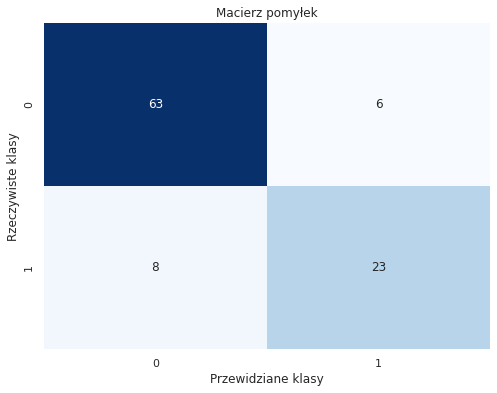

In [7]:

preds_test2 = (probs_test2 > 0.5).astype(int)

conf_matrix = confusion_matrix(test2_data['y'], preds_test2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Macierz pomyłek')
plt.xlabel('Przewidziane klasy')
plt.ylabel('Rzeczywiste klasy')
plt.show()
